<a href="https://colab.research.google.com/github/levchenkopavlo/AI/blob/master/11_%D0%94%D0%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ваша задача методом градієнтного спуску знайти коефіцієнти для задачі регресії. Обираємо метод лінійної регресії та дані про діаманти

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/diamonds.csv",
                 index_col=0)

df.head()

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335


In [ ]:
print('dimensions: ', df.shape, end='\n\n')
print(df.columns, end='\n\n')
print('types of columns:\n',df.dtypes, end='\n\n', sep='')
print('missing values:\n', df.isnull().sum(), end='\n\n', sep='')
df.describe()

dimensions:  (53940, 2)

Index(['carat', 'price'], dtype='object')

types of columns:
carat    float64
price      int64
dtype: object

missing values:
carat    0
price    0
dtype: int64



,carat,price
count,53940.000000,53940.000000
mean,0.797940,3932.799722
std,0.474011,3989.439738
min,0.200000,326.000000
25%,0.400000,950.000000
50%,0.700000,2401.000000
75%,1.040000,5324.250000
max,5.010000,18823.000000


In [ ]:
# імпорт модуля
import torch
import numpy as np

# створіть тензори без градієнтів
y =  torch.tensor(df['price'])
x =  torch.tensor(df['carat'])

# створіть тензори з градієнтом, оберіть довільне початкове значення
coef = torch.tensor(1.0, requires_grad=True)
intercept = torch.tensor(1.0, requires_grad=True)

# вкажіть навчальний крок
learning_rate = 1e-2

# визначення алгоритму

# основний цикл
# losses = []
for t in range(2000):
  # обрахуйте прогноз моделі за формулою лінійної регресії
  y_pred = coef * x + intercept

  # обрахуйте метрику середньо квадратичного
  # не використовуйте sklearn, лише функції torch
  # див torch.mean
  loss = torch.mean((y_pred - y) ** 2)
  # losses.append(loss.item())

  # виведіть значення метрики для кожного сотого кроку
  if t % 100 == 0:
        print(f"Step {t}, Loss: {loss.item()}")


  # обрахуйте градієнти по метриці
  loss.backward()

  # градієнтний спуск
  with torch.no_grad():
        coef -= learning_rate * coef.grad
        intercept -= learning_rate * intercept.grad

        coef.grad = None
        intercept.grad = None


Step 0, Loss: 31364624.1325368
Step 100, Loss: 6464009.938787795
Step 200, Loss: 4804659.034445834
Step 300, Loss: 3829238.5138418986
Step 400, Loss: 3249154.8515618015
Step 500, Loss: 2904172.6056090244
Step 600, Loss: 2699008.1781749274
Step 700, Loss: 2576994.269906574
Step 800, Loss: 2504431.9462315426
Step 900, Loss: 2461277.662813468
Step 1000, Loss: 2435613.7955614147
Step 1100, Loss: 2420351.2013901635
Step 1200, Loss: 2411274.414377919
Step 1300, Loss: 2405876.230613163
Step 1400, Loss: 2402665.9448158173
Step 1500, Loss: 2400756.666540446
Step 1600, Loss: 2399621.224163257
Step 1700, Loss: 2398945.9237291305
Step 1800, Loss: 2398544.3252291074
Step 1900, Loss: 2398305.5022779233


# Результат

In [ ]:
coef.item(), intercept.item()

(7726.884765625, -2229.2744140625)

# Порівняйте результат з sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

model_sk = LinearRegression()
X_train = df.drop(columns=['price'])
y_train = df['price']
# тренування
model_sk.fit(X_train, y_train)

y_pred_sk = model_sk.predict(X_train)

In [ ]:
model_sk.coef_[0], model_sk.intercept_

(7756.425617968435, -2256.360580045403)

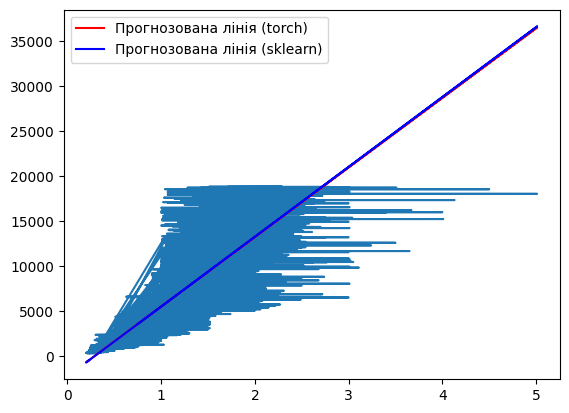

In [ ]:
import matplotlib.pyplot as plt

xs = torch.linspace(0, 5, 200)
plt.plot(df['carat'], df['price'])
plt.plot(df['carat'], y_pred.detach().numpy(), color='red', label='Прогнозована лінія (torch)')
plt.plot(df['carat'], y_pred_sk, color='blue', label='Прогнозована лінія (sklearn)')



plt.legend()
